In [1]:
pwd

'D:\\11_dec_eda_data_cleening_class'

In [2]:
# Import all library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Specify file paths

airlines_path = "data/airlines.csv"
airport_path = "data/airports.csv"
flights_path = "data/flights.csv"

In [4]:
# Read data into DataFrames

airlines_data = pd.read_csv(airlines_path)
airport_data = pd.read_csv(airport_path)
flights_data = pd.read_csv(flights_path)

C:\Users\abc\AppData\Local\Temp\ipykernel_4284\1757447.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv(flights_path)


In [5]:
airlines_data.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
airport_data.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
airport_data.COUNTRY.unique()

array(['USA'], dtype=object)

In [9]:
airport_data.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
airport_data.dropna(axis=0 , inplace=True)

In [11]:
airport_data.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [12]:
# lAT and LONG pair

lat_lonh_pairs = []
airport_code = []

for i in range(airport_data.shape[0]):
    lat_i = airport_data['LATITUDE'].iloc[i]
    long_i = airport_data['LONGITUDE'].iloc[i]
    lat_lonh_pairs.append((lat_i, long_i))
    
    iata_i = airport_data['IATA_CODE'].iloc[i]
    airport_code.append(iata_i)

In [13]:
lat_lonh_pairs

[(40.65236, -75.4404),
 (32.41132, -99.6819),
 (35.04022, -106.60919),
 (45.44906, -98.42183),
 (31.53552, -84.19447),
 (41.25305, -70.06018),
 (31.61129, -97.23052),
 (40.97812, -124.10862),
 (39.45758, -74.57717),
 (51.87796, -176.64603),
 (57.74997, -152.49386),
 (31.32737, -92.54856),
 (33.36996, -81.9645),
 (58.6768, -156.64922),
 (42.74812, -73.80298),
 (42.55708, -92.40034),
 (35.21937, -101.70593),
 (61.17432, -149.99619),
 (45.07807, -83.56029),
 (39.22316, -106.86885),
 (33.64044, -84.42694),
 (44.25741, -88.51948),
 (30.19453, -97.66987),
 (35.43619, -82.54181),
 (41.33815, -75.72427),
 (42.23488, -85.55206),
 (41.93887, -72.68323),
 (60.77978, -161.838),
 (35.4336, -119.05677),
 (42.20848, -75.97961),
 (44.80744, -68.82814),
 (33.56294, -86.75355),
 (45.80766, -108.54286),
 (46.77411, -100.74672),
 (47.50942, -94.93372),
 (48.79275, -122.53753),
 (40.47799, -88.91595),
 (36.12448, -86.67818),
 (43.56444, -116.22278),
 (42.36435, -71.00518),
 (29.95083, -94.02069),
 (31.2590

In [14]:
airport_code

['ABE',
 'ABI',
 'ABQ',
 'ABR',
 'ABY',
 'ACK',
 'ACT',
 'ACV',
 'ACY',
 'ADK',
 'ADQ',
 'AEX',
 'AGS',
 'AKN',
 'ALB',
 'ALO',
 'AMA',
 'ANC',
 'APN',
 'ASE',
 'ATL',
 'ATW',
 'AUS',
 'AVL',
 'AVP',
 'AZO',
 'BDL',
 'BET',
 'BFL',
 'BGM',
 'BGR',
 'BHM',
 'BIL',
 'BIS',
 'BJI',
 'BLI',
 'BMI',
 'BNA',
 'BOI',
 'BOS',
 'BPT',
 'BQK',
 'BQN',
 'BRD',
 'BRO',
 'BRW',
 'BTM',
 'BTR',
 'BTV',
 'BUF',
 'BUR',
 'BWI',
 'BZN',
 'CAE',
 'CAK',
 'CDC',
 'CDV',
 'CEC',
 'CHA',
 'CHO',
 'CHS',
 'CID',
 'CIU',
 'CLD',
 'CLE',
 'CLL',
 'CLT',
 'CMH',
 'CMI',
 'CMX',
 'CNY',
 'COD',
 'COS',
 'COU',
 'CPR',
 'CRP',
 'CRW',
 'CSG',
 'CVG',
 'CWA',
 'DAB',
 'DAL',
 'DAY',
 'DBQ',
 'DCA',
 'DEN',
 'DFW',
 'DHN',
 'DIK',
 'DLG',
 'DLH',
 'DRO',
 'DSM',
 'DTW',
 'DVL',
 'EAU',
 'EGE',
 'EKO',
 'ELM',
 'ELP',
 'ERI',
 'ESC',
 'EUG',
 'EVV',
 'EWN',
 'EWR',
 'EYW',
 'FAI',
 'FAR',
 'FAT',
 'FAY',
 'FCA',
 'FLG',
 'FLL',
 'FNT',
 'FSD',
 'FSM',
 'FWA',
 'GCC',
 'GCK',
 'GEG',
 'GFK',
 'GGG',
 'GJT',
 'GNV',


In [15]:
airport_data.shape[0]

319

In [16]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import folium
from folium.features import DivIcon

In [18]:
usa_lat = 40.730610
usa_long = -73.93524

usa_map = folium.Map((usa_lat, usa_long), width=1000, hieght=500)


html= '<div style="color: red; font-size: 8pt; border-style: dotted;">airport_code</div>'

for loc, air_code in zip(lat_lonh_pairs, airport_code):
    folium.Marker(loc, icon = DivIcon(icon_size=(30,30),html = html.replace('airport_code', air_code))).add_to(usa_map)
    
for loc, air_code in zip(lat_lonh_pairs, airport_code):
    folium.Marker(loc).add_to(usa_map)    

In [39]:
usa_map

In [22]:
airport_data.shape

(319, 7)

In [27]:
# flights_dataset
# find the percebtage of value missing on each xolimn of flights data

def get_null_data(data):
    
    total_rows = data.shape[0]
    for columns in data.columns:
        null_values = data[columns].isnull().sum()
        if null_values>0:
            per_null_values = float(null_values)*100/total_rows
            print(f'{columns} column has {per_null_values} null values')

In [28]:
get_null_data(flights_data)

TAIL_NUMBER column has 0.25297817747447665 null values
DEPARTURE_TIME column has 1.4805263857046793 null values
DEPARTURE_DELAY column has 1.4805263857046793 null values
TAXI_OUT column has 1.5302593417274453 null values
WHEELS_OFF column has 1.5302593417274453 null values
SCHEDULED_TIME column has 0.00010310910025452482 null values
ELAPSED_TIME column has 1.8056293788071962 null values
AIR_TIME column has 1.8056293788071962 null values
WHEELS_ON column has 1.5898220319744756 null values
TAXI_IN column has 1.5898220319744756 null values
ARRIVAL_TIME column has 1.5898220319744756 null values
ARRIVAL_DELAY column has 1.8056293788071962 null values
CANCELLATION_REASON column has 98.45535693878705 null values
AIR_SYSTEM_DELAY column has 81.72496025573807 null values
SECURITY_DELAY column has 81.72496025573807 null values
AIRLINE_DELAY column has 81.72496025573807 null values
LATE_AIRCRAFT_DELAY column has 81.72496025573807 null values
WEATHER_DELAY column has 81.72496025573807 null values


In [29]:
flights_data.count()

YEAR                   5819079
MONTH                  5819079
DAY                    5819079
DAY_OF_WEEK            5819079
AIRLINE                5819079
FLIGHT_NUMBER          5819079
TAIL_NUMBER            5804358
ORIGIN_AIRPORT         5819079
DESTINATION_AIRPORT    5819079
SCHEDULED_DEPARTURE    5819079
DEPARTURE_TIME         5732926
DEPARTURE_DELAY        5732926
TAXI_OUT               5730032
WHEELS_OFF             5730032
SCHEDULED_TIME         5819073
ELAPSED_TIME           5714008
AIR_TIME               5714008
DISTANCE               5819079
WHEELS_ON              5726566
TAXI_IN                5726566
SCHEDULED_ARRIVAL      5819079
ARRIVAL_TIME           5726566
ARRIVAL_DELAY          5714008
DIVERTED               5819079
CANCELLED              5819079
CANCELLATION_REASON      89884
AIR_SYSTEM_DELAY       1063439
SECURITY_DELAY         1063439
AIRLINE_DELAY          1063439
LATE_AIRCRAFT_DELAY    1063439
WEATHER_DELAY          1063439
dtype: int64

In [30]:
cols_to_drop = ['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY']
flights_data.drop(cols_to_drop, axis=1, inplace=True)

In [31]:
row_after_dropping_null = flights_data.dropna(axis=0).shape[0]
rows_before_dropping_null = flights_data.shape[0]

per_info_loss = (rows_before_dropping_null - row_after_dropping_null)*100/rows_before_dropping_null
print(f'Percentage Information loss after dropping null values is {round(per_info_loss,2)}%')

Percentage Information loss after dropping null values is 81.72%


In [32]:
flights_data.dropna(axis=1, inplace=True)

In [33]:
get_null_data(flights_data)

In [34]:
import warnings
warnings.filterwarnings('ignore')

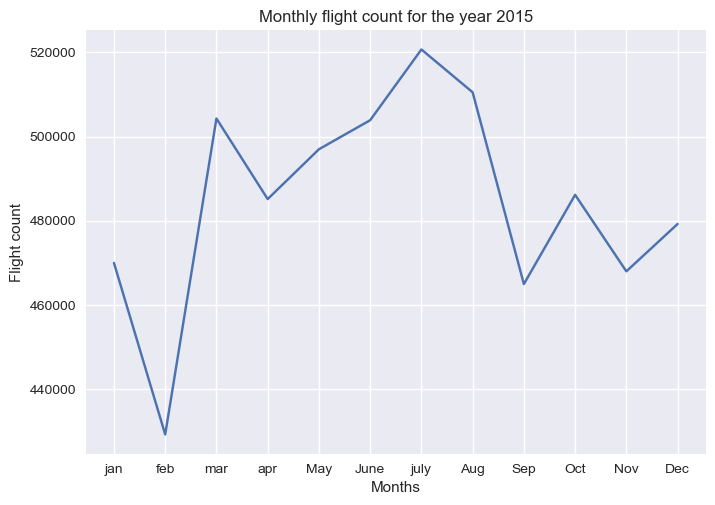

In [35]:
# plot the monthly data

plt.style.use('seaborn')
labels = ["jan", 'feb', 'mar', 'apr', 'May', 'June', 'july', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
flights_data.groupby('MONTH').count()['FLIGHT_NUMBER'].plot()
plt.xlabel("Months")
plt.xticks(labels=labels, ticks=np.arange(1,13))
plt.ylabel('Flight count')
plt.title('Monthly flight count for the year 2015')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

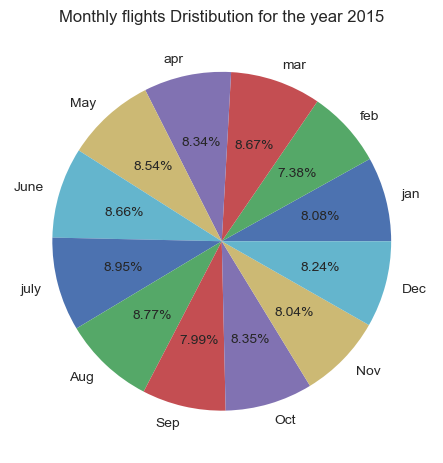

In [36]:
plt.pie(x=flights_data.groupby('MONTH').count()['FLIGHT_NUMBER'], labels=labels, autopct='%0.2f%%')
plt.title('Monthly flights Dristibution for the year 2015')
plt.show

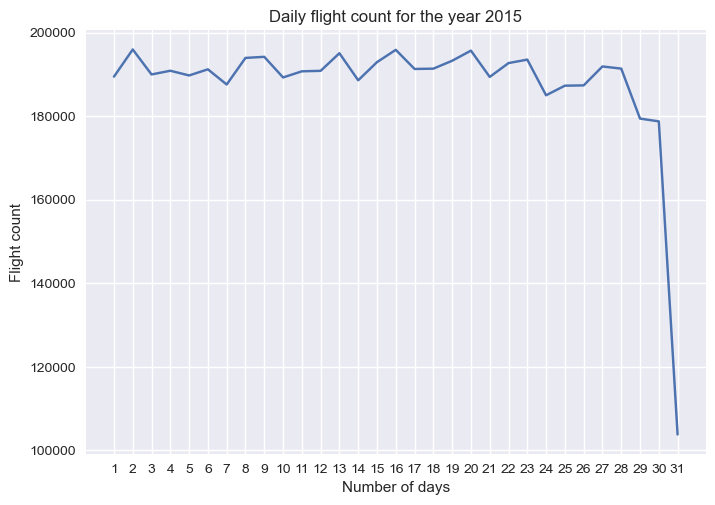

In [37]:
# plot the day data

plt.style.use('seaborn')
flights_data.groupby('DAY').count()['AIRLINE'].plot()
plt.xlabel("Number of days")
plt.xticks(ticks=np.arange(1,32))
plt.ylabel('Flight count')
plt.title('Daily flight count for the year 2015')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

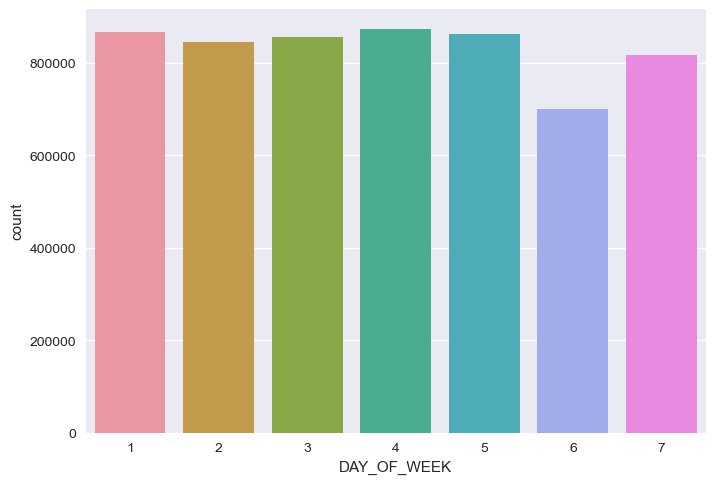

In [38]:
sns.countplot(data=flights_data, x='DAY_OF_WEEK')
plt.show